In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings(action='ignore')

# Uploading the dataset as a Pandas Dataframe


### Dataframe :-
The Pandas DataFrame can be seen as a table. It organizes data into rows and columns, making it a two-dimensional data structure. Potentially, the columns are of a different type and the size of the DataFrame is mutable, and hence can be modified.




The diabetes dataset is then uploqaded for analysis and training of the model. The data is uploaded as a Pandas data-frame, which is a very efficient way to work with huge data sets.

#### About the data :-

The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

* Pregnancies : Number of times pregnant

* Glucose : Plasma glucose concentration a 2 hours in an oral glucose tolerance test

* BloodPressure : Diastolic blood pressure (mm Hg)

* SkinThickness : Triceps skin fold thickness (mm)

* Insulin : 2-Hour serum insulin (mu U/ml)

* BMI : Body mass index (weight in kg/(height in m)^2)

* DiabetesPedigreeFunction : Diabetes pedigree function (If provided some data on diabetes mellitus history in relatives and the genetic relationship of those relatives to the patient. Diabetes pedigree function is a measure of genetic influence gaving an idea of the hereditary risk one might have with the onset of diabetes mellitus.)

* Age : Age (years)


* Outcome : Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [3]:
# Reading dataframe
df = pd.read_csv('../pima-indians-diabetes-database/diabetes.csv')

In [4]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
# Description of data
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Inference :

There are in total of 768 entries or data members with 8 trainable independent variable to be analyzed to predict 1 dependent variable (The Outcome).

## Exploratory Data Analysis (EDA)

In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

Exploratory data analysis encourage statisticians to explore the data, and possibly formulate hypotheses that could lead to new data collection and experiments. EDA is different from initial data analysis, which focuses more narrowly on checking assumptions required for model fitting and hypothesis testing, and handling missing values and making transformations of variables as needed.

<Axes: xlabel='Outcome', ylabel='count'>

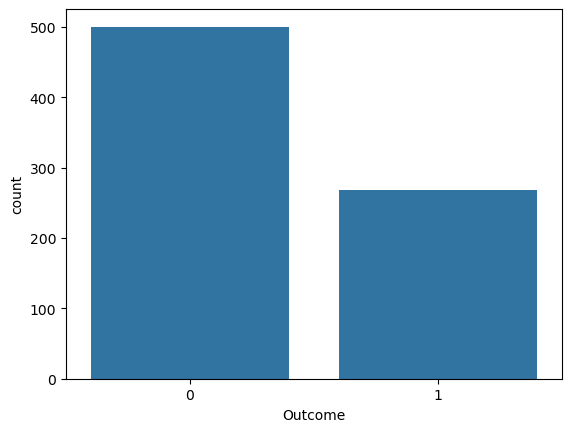

In [8]:
sns.countplot(x = df['Outcome'])

<Axes: >

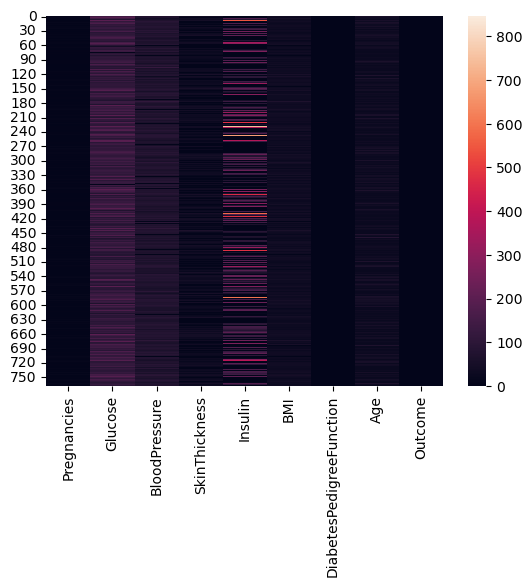

In [9]:
sns.heatmap(df)

    This suggest that the dataset is not uniformly distributed or not normalized.

<Axes: xlabel='Age', ylabel='Density'>

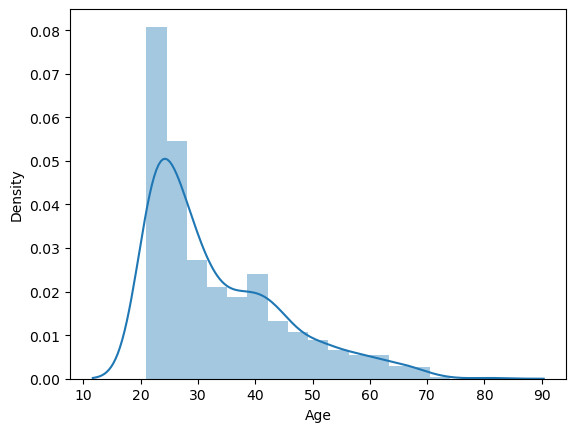

In [10]:
sns.distplot(df['Age'])

<Axes: xlabel='Pregnancies', ylabel='Density'>

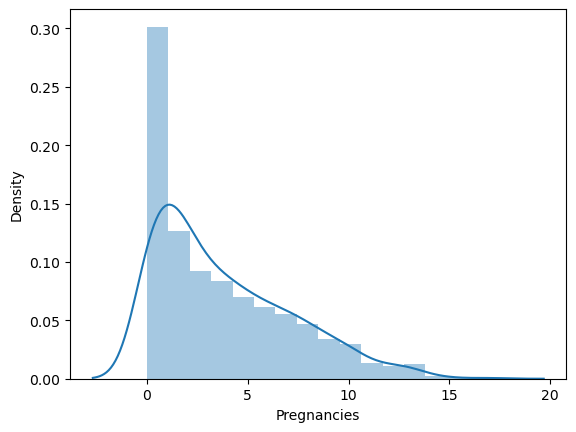

In [11]:
sns.distplot(df['Pregnancies'])

<Axes: xlabel='Glucose', ylabel='Density'>

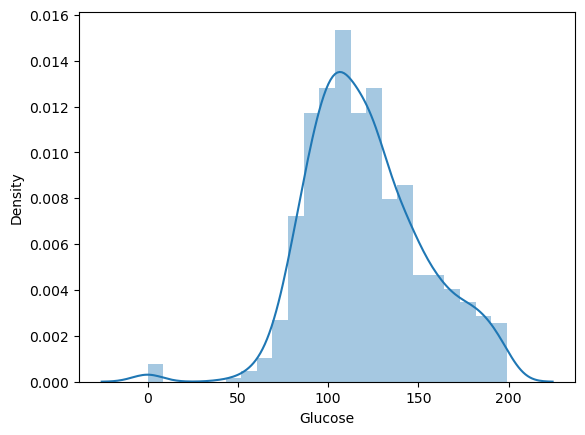

In [12]:
sns.distplot(df['Glucose'])

<Axes: xlabel='BloodPressure', ylabel='Density'>

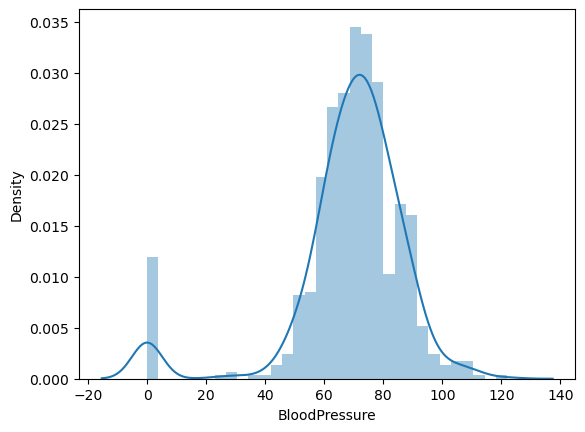

In [19]:
sns.distplot(df['BloodPressure'])

<Axes: xlabel='SkinThickness', ylabel='Density'>

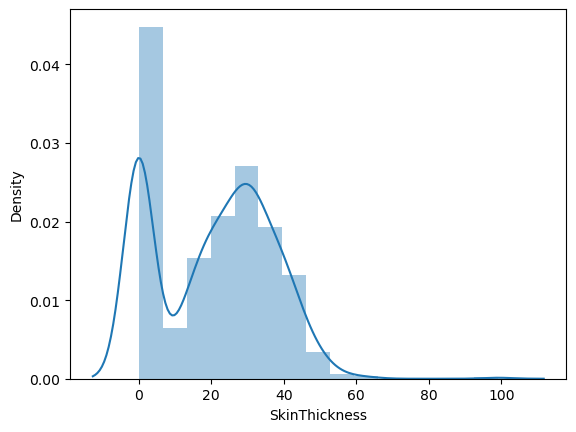

In [20]:
sns.distplot(df['SkinThickness'])

<Axes: xlabel='Insulin', ylabel='Density'>

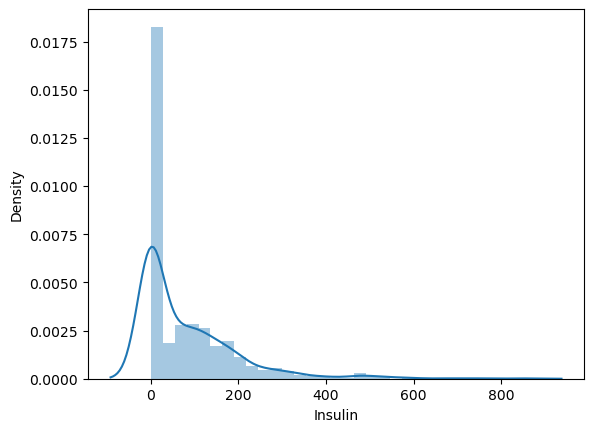

In [21]:
sns.distplot(df['Insulin'])

<Axes: xlabel='BMI', ylabel='Density'>

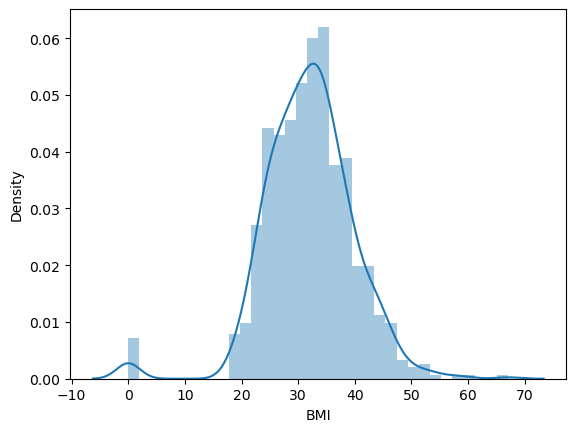

In [22]:
sns.distplot(df['BMI'])

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Density'>

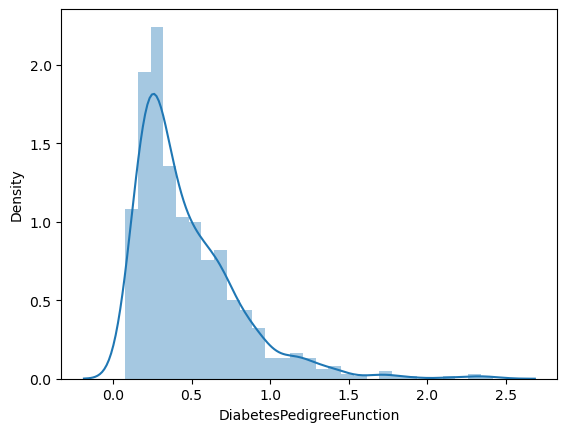

In [23]:
sns.distplot(df['DiabetesPedigreeFunction'])

    Some of the attributes look normally distributed (plas, pres, skin, and mass).

    Some of the attributes look like they may have an exponential distribution (preg, insu, pedi, age).

    Clearly here any one factor does not heavy too much on the detection of diabetes, Hence we need to move along with feature crosses and analyze.

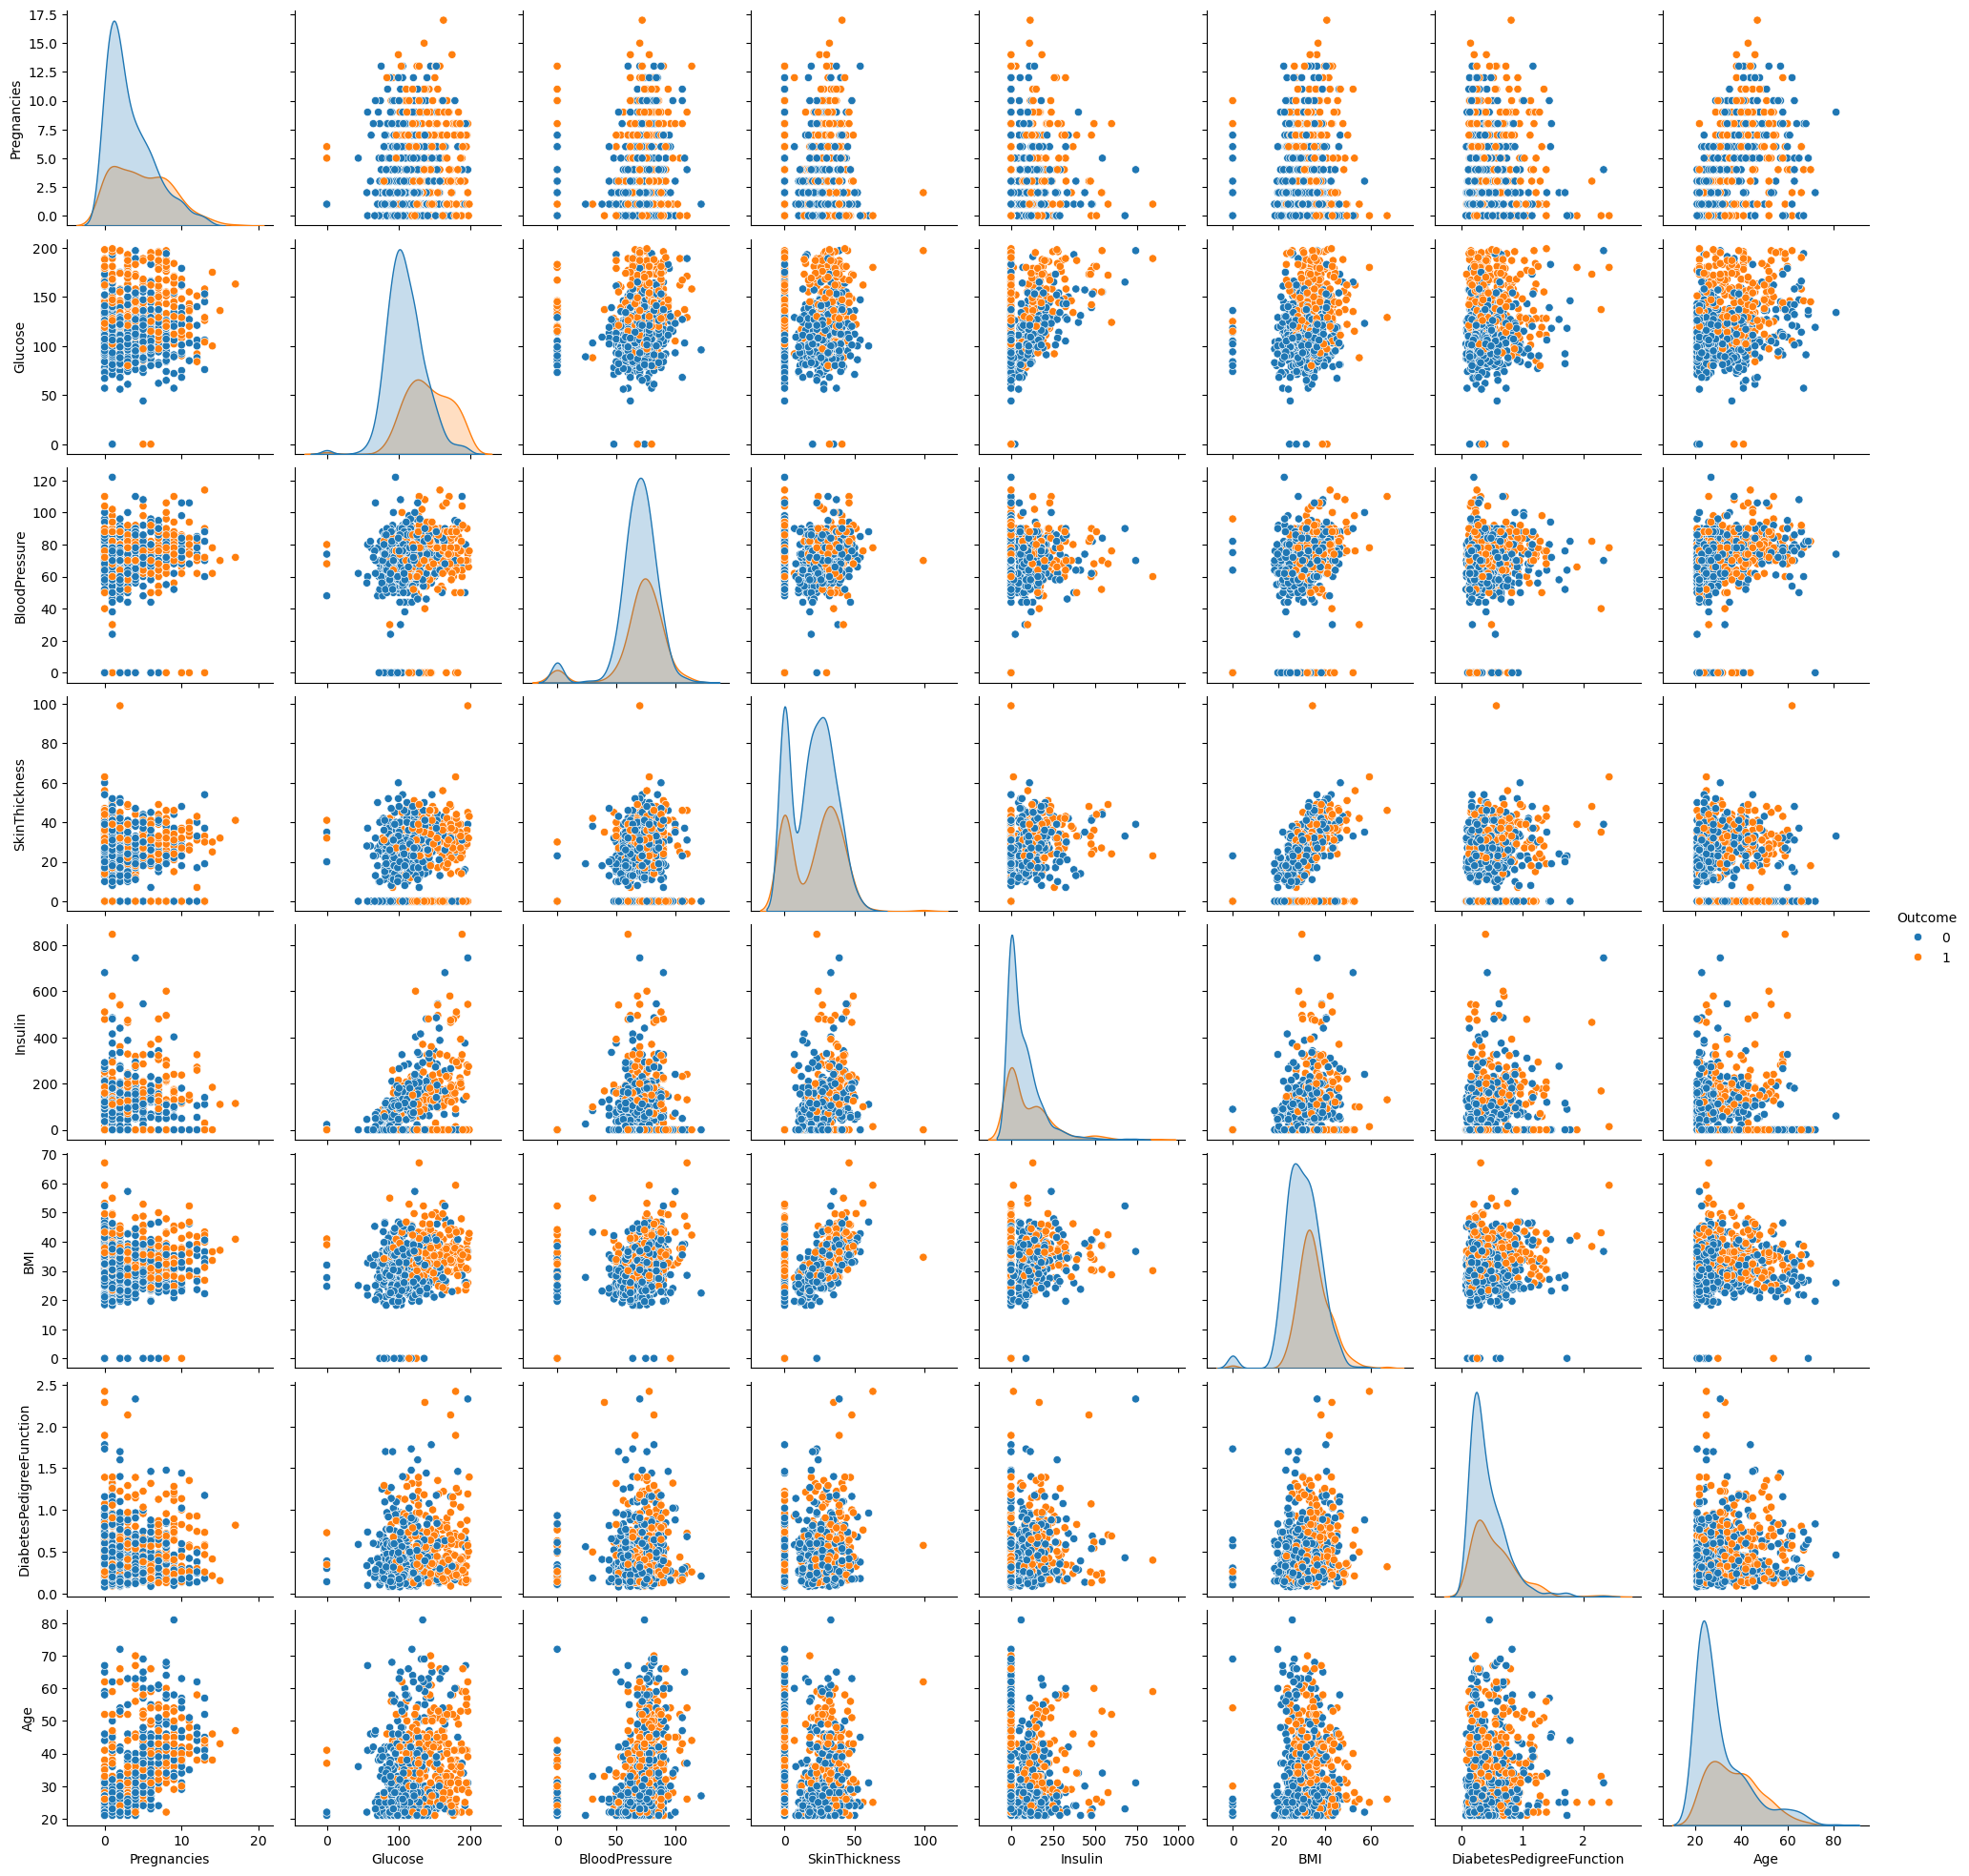

In [24]:
sns.pairplot(df,hue='Outcome')

<Axes: xlabel='BloodPressure', ylabel='Glucose'>

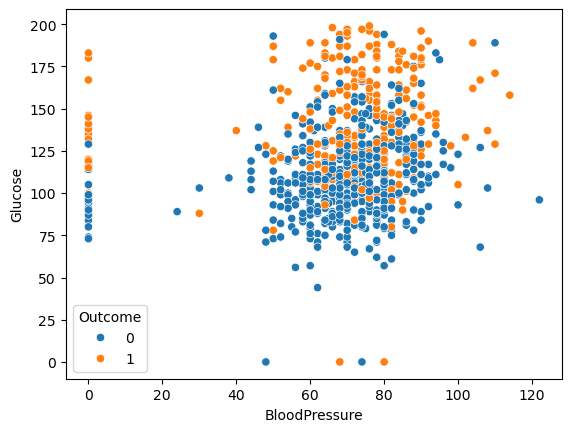

In [26]:
sns.scatterplot(x = df['BloodPressure'], y = df['Glucose'],hue=df['Outcome'])

<Axes: xlabel='SkinThickness', ylabel='Glucose'>

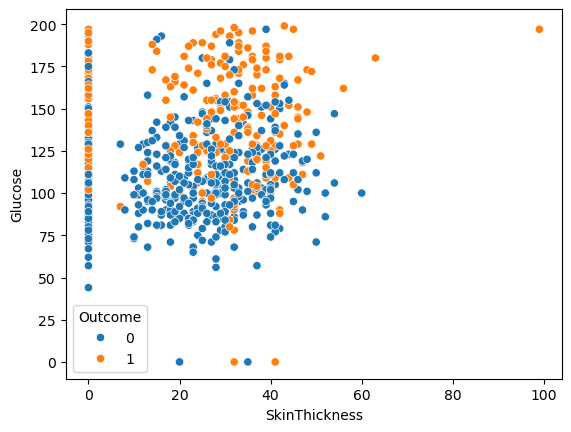

In [27]:
sns.scatterplot(x = df['SkinThickness'], y = df['Glucose'],hue=df['Outcome'])

<Axes: xlabel='BMI', ylabel='Glucose'>

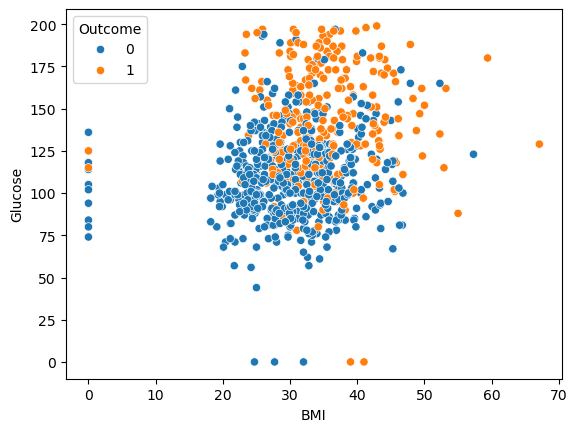

In [28]:
sns.scatterplot(x = df['BMI'], y = df['Glucose'], hue=df['Outcome'])

<Axes: xlabel='Age', ylabel='Glucose'>

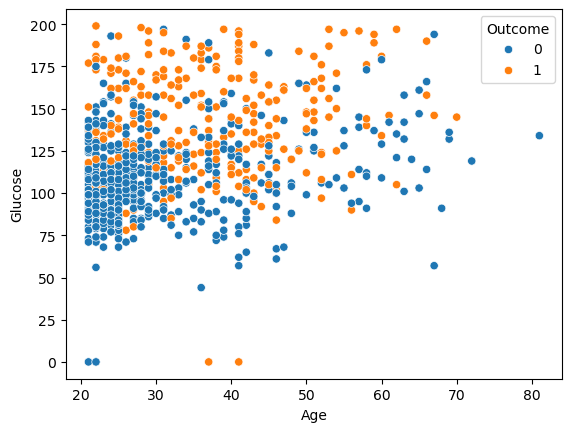

In [29]:
sns.scatterplot(x = df['Age'], y = df['Glucose'],hue=df['Outcome'])

<Axes: xlabel='BMI', ylabel='BloodPressure'>

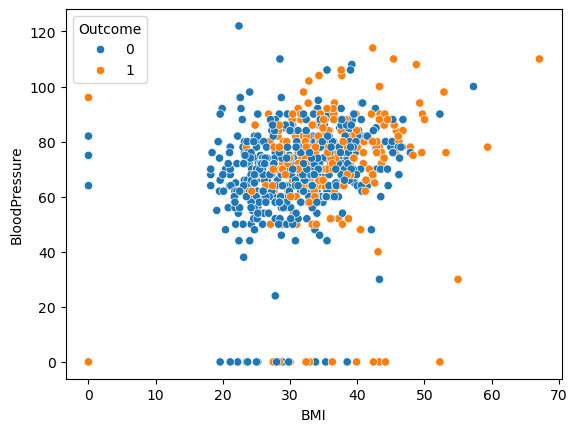

In [30]:
sns.scatterplot(x = df['BMI'], y = df['BloodPressure'],hue=df['Outcome'])

<Axes: xlabel='Insulin', ylabel='BloodPressure'>

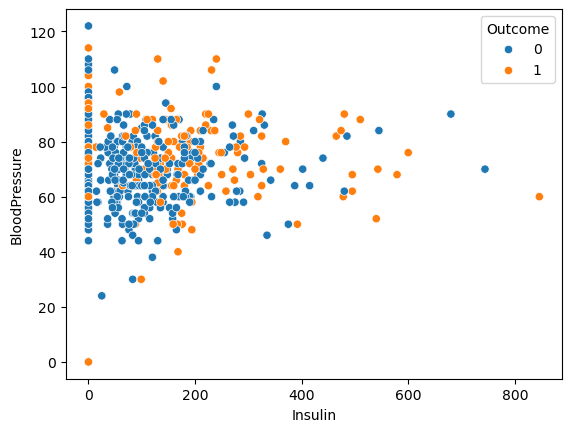

In [31]:
sns.scatterplot(x = df['Insulin'], y = df['BloodPressure'],hue=df['Outcome'])

<Axes: xlabel='Age', ylabel='BloodPressure'>

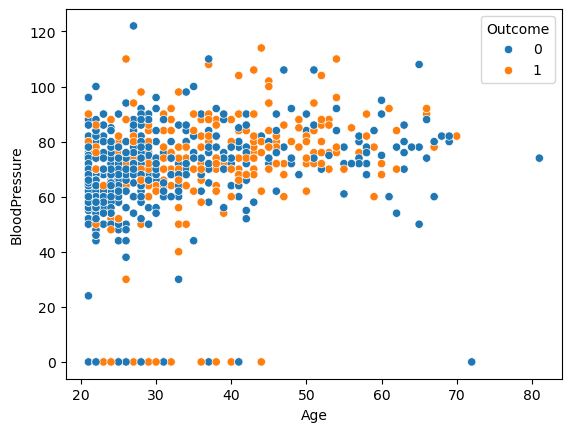

In [32]:
sns.scatterplot(x = df['Age'], y = df['BloodPressure'], hue=df['Outcome'])

<Axes: xlabel='Age', ylabel='SkinThickness'>

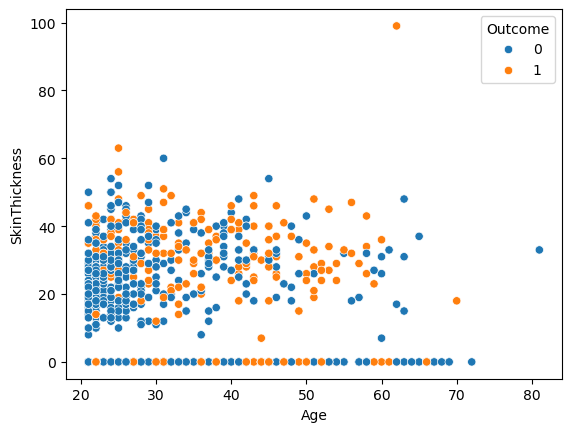

In [34]:
sns.scatterplot(x = df['Age'], y = df['SkinThickness'],hue=df['Outcome'])

<Axes: xlabel='BMI', ylabel='Age'>

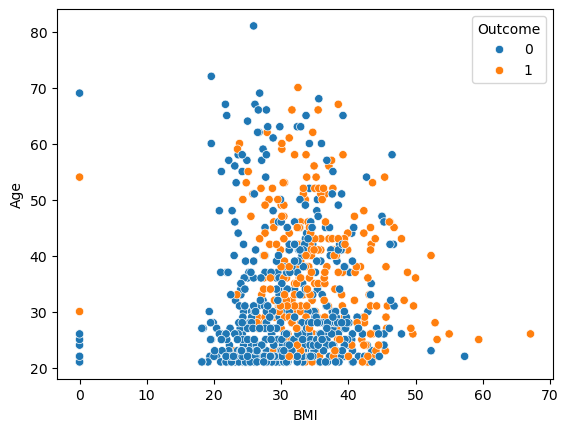

In [35]:
sns.scatterplot(x = df['BMI'],y = df['Age'],hue=df['Outcome'])

<Axes: xlabel='Age', ylabel='Insulin'>

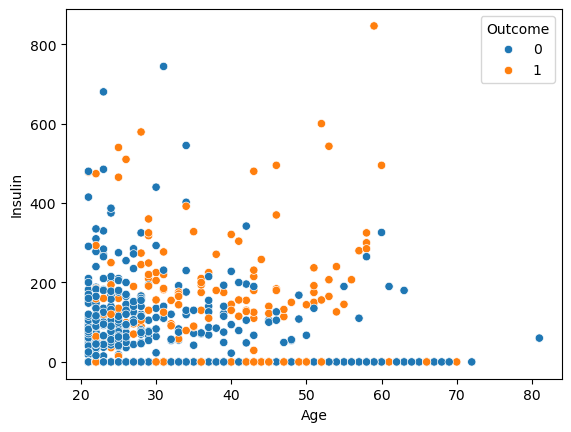

In [36]:
sns.scatterplot(x = df['Age'], y = df['Insulin'],hue=df['Outcome'])

    There is no obvious relationship between age and onset of diabetes.

    There is no obvious relationship between pedi function and onset of diabetes.
    
    This may suggest that diabetes is not hereditary, or that the Diabetes Pedigree Function needs work.
    
    Larger values of plas combined with larger values for age, pedi, mass, insu, skin, pres, and preg tends to show greater likelihood of testing positive for diabetes.

## Splitting the Data Set

The idea is to divide the data set into two subsets:

* training set — A subset to train a model.
* test set — A subset to test the trained model.

Assuming that your test set meets the preceding two conditions, your goal is to create a model that generalizes well to new data. Our test set serves as a proxy for new data.

We're going to use sklearn's train_test_split function to generate a training dataset, which will be about most of the total data, and then a testing dataset, which will be less of the total data.


In [13]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [15]:
X_train.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
364            4      147             74             25      293  34.9   
446            1      100             72             12       70  25.3   
366            6      124             72              0        0  27.6   
213            0      140             65             26      130  42.6   
724            1      111             94              0        0  32.8   

     DiabetesPedigreeFunction  Age  
364                     0.385   30  
446                     0.658   28  
366                     0.368   29  
213                     0.431   24  
724                     0.265   45

In [16]:
y_train.head()

364    0
446    0
366    1
213    1
724    0
Name: Outcome, dtype: int64

## Initializing the model

### KERAS :-

Keras is an open source neural network library written in Python. It is capable of running on top of TensorFlow, Microsoft Cognitive Toolkit, Theano, or MXNet. Designed to enable fast experimentation with deep neural networks, it focuses on being user-friendly, modular, and extensible.

Keras is a high-level API to build and train deep learning models. It's used for fast prototyping, advanced research, and production, with three key advantages:

* User friendly : Keras has a simple, consistent interface optimized for common use cases. It provides clear and actionable feedback for user errors.
    
* Modular and composable : Keras models are made by connecting configurable building blocks together, with few restrictions.

* Easy to extend : Write custom building blocks to express new ideas for research. Create new layers, loss functions, and develop state-of-the-art models.

In 2017, Google's TensorFlow team decided to support Keras in TensorFlow's core library. Chollet explained that Keras was conceived to be an interface rather than a standalone machine learning framework. It offers a higher-level, more intuitive set of abstractions that make it easy to develop deep learning models regardless of the computational backend used. Microsoft added a CNTK backend to Keras as well, available as of CNTK v2.0.



There are two ways to build Keras models:

* The sequential API allows you to create models layer-by-layer for most problems. It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs.

* The functional API allows you to create models that have a lot more flexibility as you can easily define models where layers connect to more than just the previous and next layers. In fact, you can connect layers to (literally) any other layer. As a result, creating complex networks such as siamese networks and residual networks become possible.


------------------------------------------------------------------------------------------------------------------------



The Sequential model API is great for developing deep learning models in most situations

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [18]:
model = Sequential()

model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss="mse", optimizer="adam", metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 253 (1012.00 B)

 Trainable params: 253 (1012.00 B)

 Non-trainable params: 0 (0.00 B)

## Training the model

Keras provides the capability to register callbacks when training a deep learning model.

One of the default callbacks that is registered when training all deep learning models is the History callback. It records training metrics for each epoch. This includes the loss and the accuracy (for classification problems) as well as the loss and accuracy for the validation dataset, if one is set.

The history object is returned from calls to the fit() function used to train the model. Metrics are stored in a dictionary in the history member of the object returned.

In [ ]:
model.fit(X_train, y_train, epochs = 2500, batch_size=15, validation_data=(X_test, y_test))

Epoch 1/2500
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.6746 - loss: 0.3243 - val_accuracy: 0.6198 - val_loss: 0.3786
Epoch 2/2500
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6616 - loss: 0.3311 - val_accuracy: 0.6198 - val_loss: 0.3641
Epoch 3/2500
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6324 - loss: 0.3399 - val_accuracy: 0.6198 - val_loss: 0.2999
Epoch 4/2500
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6379 - loss: 0.2784 - val_accuracy: 0.6146 - val_loss: 0.2958
Epoch 5/2500
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6498 - loss: 0.2842 - val_accuracy: 0.6354 - val_loss: 0.2854
Epoch 6/2500
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6760 - loss: 0.2716 - val_accuracy: 0.6562 - val_loss: 0.2788
Epoch 7/2500
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6605 - loss: 0.2606 - val_accuracy: 0.6354 - val_loss: 0.2447
Epoch 8/2500
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6627 - loss: 0.2485 - val_accurac

## Saving the model

Keras also supports a simpler interface to save both the model weights and model architecture together into a single H5 file.

Saving the model in this way includes everything we need to know about the model, including:

* Model weights.
* Model architecture.
* Model compilation details (loss and metrics).
* Model optimizer state.

This means that we can load and use the model directly, without having to re-compile it.

In [53]:
model.save('my_model.keras')

## Loading saved model

Your saved model can then be loaded later by calling the load_model() function and passing the filename. The function returns the model with the same architecture and weights.

In this case, we load the model, summarize the architecture and evaluate it on the same dataset to confirm the weights and architecture are the same.

In [21]:
from keras.models import load_model

In [22]:
model = load_model('my_model.keras')

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 508 (1.99 KB)

 Trainable params: 253 (1012.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 255 (1.00 KB)

## Making predictions

Once you choose and fit a final deep learning model in Keras, you can use it to make predictions on new data instances.

In [24]:
print(model.predict(np.array([2,67,64,43,145,42,0.32,75]).reshape((1,8))))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
[[0.01054889]]


### Contribution  Code :
* Let's change parameters while training model

In [ ]:
# Define another model object with same number of layers defined in original code
model2 = Sequential()

model2.add(Dense(12, input_dim=8, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dropout(.2))
model2.add(Dense(4, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss="mse", optimizer="adam", metrics=['accuracy'])

# Check model summary
model2.summary()

# Train model with 1500 epochs and batch size as 10
model2.fit(X_train, y_train, epochs = 1500, batch_size=10, validation_data=(X_test, y_test))

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 12)                  │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 253 (1012.00 B)

 Trainable params: 253 (1012.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1500
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.3796 - loss: 0.5793 - val_accuracy: 0.5312 - val_loss: 0.4300
Epoch 2/1500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5103 - loss: 0.4232 - val_accuracy: 0.6198 - val_loss: 0.3796
Epoch 3/1500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5860 - loss: 0.3656 - val_accuracy: 0.6198 - val_loss: 0.3803
Epoch 4/1500
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7010 - loss: 0.2844 - val_accuracy: 0.6198 - val_loss: 0.3804
Epoch 5/1500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6058 - loss: 0.3563 - val_accuracy: 0.6198 - val_loss: 0.3804
Epoch 6/1500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6783 - loss: 0.2950 - val_accuracy: 0.6198 - val_loss: 0.3806
Epoch 7/1500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6235 - loss: 0.3399 - val_accuracy: 0.6198 - val_loss: 0.3810
Epoch 8/1500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6359 - loss: 0.3195 - val_accuracy: 0

In [29]:
# Define another model object with same number of layers defined in original code
model3 = Sequential()

model3.add(Dense(12, input_dim=8, activation='relu'))
model3.add(Dense(8, activation='relu'))
model3.add(Dropout(.2))
model3.add(Dense(4, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(loss="mse", optimizer="adam", metrics=['accuracy'])

# Check model summary
model3.summary()

# Train model with 1200 epochs and batch size as 10
model3.fit(X_train, y_train, epochs = 1200, batch_size=10, validation_data=(X_test, y_test))

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7675 - loss: 0.1581 - val_accuracy: 0.7240 - val_loss: 0.1844
Epoch 526/1200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7294 - loss: 0.1723 - val_accuracy: 0.6823 - val_loss: 0.2072
Epoch 527/1200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7604 - loss: 0.1598 - val_accuracy: 0.6771 - val_loss: 0.2077
Epoch 528/1200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7978 - loss: 0.1425 - val_accuracy: 0.6510 - val_loss: 0.2353
Epoch 529/1200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7502 - loss: 0.1706 - val_accuracy: 0.7448 - val_loss: 0.1788
Epoch 530/1200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7621 - loss: 0.1689 - val_accuracy: 0.7031 - val_loss: 0.1897
Epoch 531/1200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7987 - loss: 0.1457 - val_accuracy: 0.6771 - val_loss: 0.2034
Epoch 532/1200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7515 - loss: 0.1692 - val_accuracy: 0

#### Let's Evaluate Updated and Old Models 

    Model -> Defined model in solution in 2500 epochs and 15 as batch size
    Model2 -> Model with updated parameters i.e with 1500 epochs and 10 as batch size
    Model3 -> Model with updated parameters i.e with 1200 epochs and 10 as batch size

In [31]:
# Evaluate Defined Model on test data
print("Evaluate on test data")
result1 = model.evaluate(X_test, y_test, batch_size=50)
print("test loss, test acc of Defined Model:", result1)

Evaluate on test data
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7073 - loss: 0.1793 
test loss, test acc of Defined Model: [0.18327446281909943, 0.7083333134651184]


In [32]:
# Evaluate Model on test data
print("Evaluate on test data")
result2 = model2.evaluate(X_test, y_test, batch_size=50)
print("test loss, test acc of Model2:", result2)

Evaluate on test data
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7300 - loss: 0.2023 
test loss, test acc of Model2: [0.20981864631175995, 0.7083333134651184]


In [33]:
# Evaluate Model on test data
print("Evaluate on test data")
result3 = model3.evaluate(X_test, y_test, batch_size=50)
print("test loss, test acc of Model3:", result3)

Evaluate on test data
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6935 - loss: 0.1966 
test loss, test acc of Model3: [0.21189932525157928, 0.6770833134651184]


    As we can see above the lesser number of epochs more accurate the model is. 

* Let's define model with updated number of nodes, layers, learning rate and early stopping callback 

In [34]:
# import required libraries
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
# Define another model object with same number of layers defined in original code
model4 = Sequential()

model4.add(Dense(12, input_dim=8, activation='relu'))
model4.add(Dense(8, activation='relu'))
model4.add(Dropout(.2))
model4.add(Dense(4, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))

model4.compile(loss="mse", optimizer="adam", metrics=['accuracy'])

# Check model summary
model4.summary()

# Define early stopping object
earlystopping = EarlyStopping(monitor='val_loss', patience=200, restore_best_weights=True)

# Train model with 1200 epochs and batch size as 10
model4.fit(X_train, y_train, epochs = 1200, batch_size=10, validation_data=(X_test, y_test), callbacks=[earlystopping])

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 12)                  │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 253 (1012.00 B)

 Trainable params: 253 (1012.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1200
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.4720 - loss: 0.4973 - val_accuracy: 0.6146 - val_loss: 0.3682
Epoch 2/1200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6355 - loss: 0.3485 - val_accuracy: 0.6146 - val_loss: 0.3618
Epoch 3/1200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6301 - loss: 0.3440 - val_accuracy: 0.5938 - val_loss: 0.3613
Epoch 4/1200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6647 - loss: 0.2950 - val_accuracy: 0.6250 - val_loss: 0.3734
Epoch 5/1200
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6785 - loss: 0.2924 - val_accuracy: 0.6146 - val_loss: 0.3825
Epoch 6/1200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6716 - loss: 0.3048 - val_accuracy: 0.6146 - val_loss: 0.3823
Epoch 7/1200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6525 - loss: 0.3130 - val_accuracy: 0.6146 - val_loss: 0.3790
Epoch 8/1200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6573 - loss: 0.3066 - val_accuracy: 0

In [37]:
# Evaluate Model4 on test data
print("Evaluate on test data")
result4 = model4.evaluate(X_test, y_test, batch_size=50)
print("test loss, test acc of Model4:", result4)

Evaluate on test data
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7549 - loss: 0.1754 
test loss, test acc of Model4: [0.1808963418006897, 0.7239583134651184]


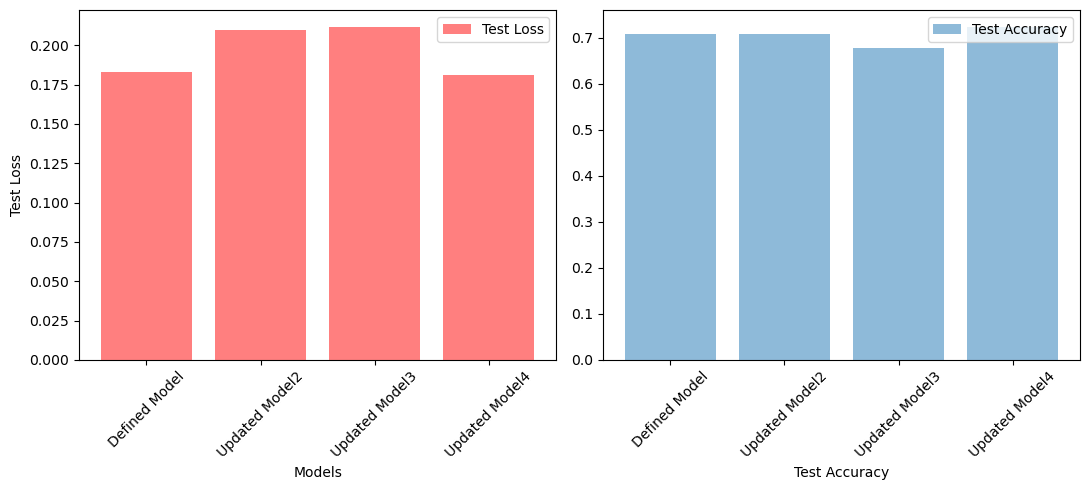

In [38]:
# Plot results of Models 
models_type = ["Defined Model", "Updated Model2", "Updated Model3", "Updated Model4"]
results = list(zip(result1, result2, result3, result4))
fig, ax = plt.subplots(1, 2, figsize=(11, 5))
ax[0].bar(models_type, results[0], label="Test Loss", color='red', alpha=0.5)
ax[1].bar(models_type, results[1], label="Test Accuracy", alpha=0.5)
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel("Models")
ax[1].set_xlabel("Models")
ax[0].set_ylabel("Test Loss")
ax[1].set_xlabel("Test Accuracy")
ax[0].set_xticklabels(models_type, rotation=45)
ax[1].set_xticklabels(models_type, rotation=45)
fig.tight_layout()